# For the creation of augmentation algorithms to be used in the EventProp HD model

### Load dataset and visualise for development

In [124]:
import numpy as np
import os
import matplotlib.pyplot as plt
import copy
from tqdm import trange

In [136]:
file_path = os.path.expanduser("~/data/rawHD/experimental_2/")
x_train = np.load(file_path + "training_x_data.npy")
y_train = np.load(file_path + "training_y_data.npy")

training_images = x_train + abs(np.floor(x_train.min()))

new_x_train = copy.deepcopy(training_images[0])
x_train = training_images[0]

### Shifting in the y axis

In [126]:
shift_value = np.random.randint(-5, 5)

if shift_value > 0:
    new_x_train[0: -shift_value, :] = x_train[shift_value:,:]
    new_x_train[-shift_value:,:] = 0
    
if shift_value < 0:
    new_x_train[-shift_value:, :] = x_train[0: shift_value, :]
    new_x_train[0:-shift_value, :] = 0

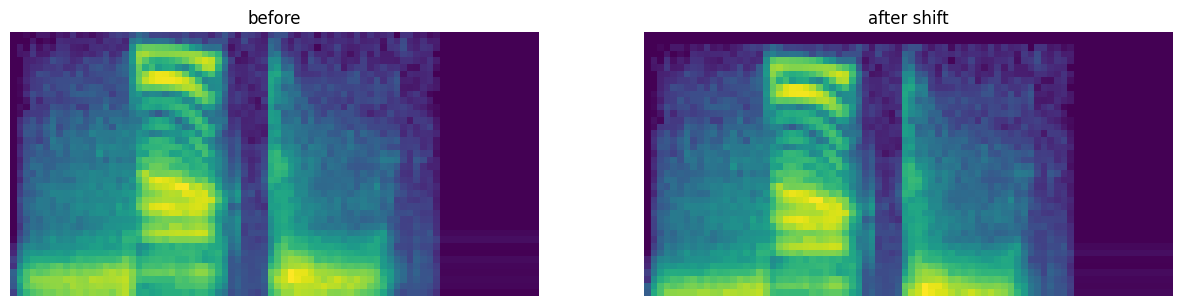

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title("before")
ax1.imshow(x_train)
ax1.axis("off")

ax2.set_title("after shift")
ax2.imshow(new_x_train)
ax2.axis("off")

plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

### adding noise to the data (neighbour swapping)



In [128]:
new_x_train = copy.deepcopy(training_images[0])
x_train = training_images[0]
pSwap = 0.2 #swap probability
kSwap = 3 #distance of neighbour swap

In [129]:
for x in range(x_train.shape[0]):
    for y in range(x_train.shape[1]):
        if np.random.uniform() > pSwap:
            k = np.random.randint(-kSwap, kSwap, 2)
            kx, ky = x + k[0], y + k[1]
            
            if kx > -1 and kx < x_train.shape[0] and ky > -1 and ky < x_train.shape[1]:
                new_x_train[kx, ky] = x_train[x, y]

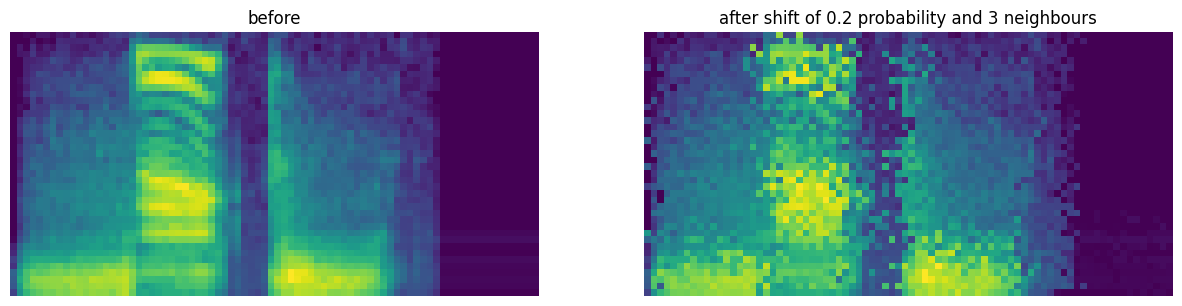

In [131]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title("before")
ax1.imshow(x_train)
ax1.axis("off")

ax2.set_title(f"after shift of {pSwap} probability and {kSwap} neighbours")
ax2.imshow(new_x_train)
ax2.axis("off")

plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

### blending classes for new image

In [162]:
# sort x training images into y categories for blending
categories = [[] for i in range(np.max(y_train) + 1)]

for i in trange(y_train.shape[0]):
    categories[y_train[i]].append(i)

100%|██████████| 8156/8156 [00:00<00:00, 3144185.98it/s]
